# 2.

In [1]:
import cv2
import numpy as np
import math

In [3]:
def Convolution(image, kernel):
    kernel = np.transpose(kernel)
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    padW = int((kW-1)/2)
    padH = int((kH-1)/2)
    padImg = cv2.copyMakeBorder(image, padH, padH, padW, padW, cv2.BORDER_REPLICATE)
    (padImgW, padImgH) = padImg.shape[:2]
    Matrix = np.zeros((iW, iH), dtype="float32")
    for i in range(0,padImgW-kW+1):
        for j in range(0,padImgH-kH+1):
            prod = np.multiply(padImg[i:i+kW, j:j+kH],kernel)
            Matrix[i,j] = sum(sum(prod))
    return Matrix

# 3.

In [7]:
img= cv2.imread('clown.tif',0)

In [8]:
sobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [9]:
sobel_op = Convolution(img,sobel)
clownsobelop = ( (sobel_op-sobel_op.min()) / (sobel_op.max() - sobel_op.min()) ) * (255 - 0) + 0
cv2.imwrite('clown_sobel.jpg', clownsobelop)

True

In [10]:
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [12]:
laplacian_op = Convolution(img,laplacian)
clownlaplacianop = ( (laplacian_op-laplacian_op.min()) / (laplacian_op.max() - laplacian_op.min()) ) * (255 - 0) + 0
cv2.imwrite('clown_laplacian.jpg', laplacian_op)

True

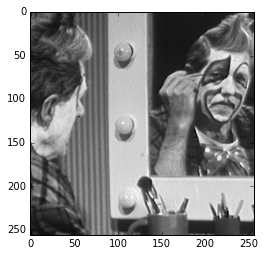

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img,cmap='gray')

### Above is the original image 

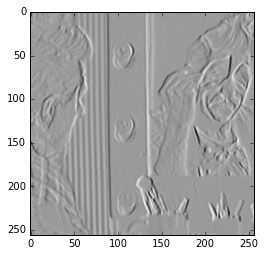

In [16]:
plt.imshow(clownsobelop,cmap='gray')

### Above is the image after sobel filter

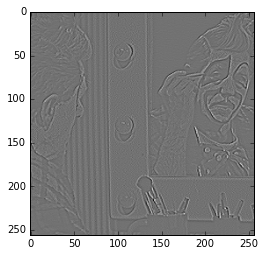

In [17]:
plt.imshow(laplacian_op,cmap='gray')

### Above is the image after laplacian filter

### The sobel filter shows the edges with better results compared to laplacian

In [19]:
from scipy.signal import convolve2d

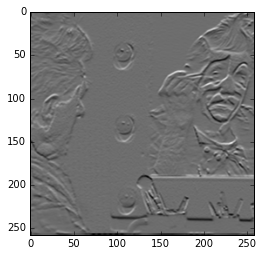

In [23]:
sobel_op_scipy = convolve2d(img,sobel)

sobelop_scipy = ( (sobel_op_scipy - sobel_op_scipy.min()) / (sobel_op_scipy.max() - sobel_op_scipy.min()) ) * (255 - 0) + 0

cv2.imwrite('clown_sobel_scipy.png',(sobelop_scipy))

plt.imshow(sobelop_scipy,cmap='gray')

### Above is the image after sobel filter from scipy

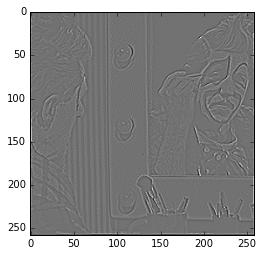

In [24]:
laplacian_op_scipy = convolve2d(img,laplacian)

laplacianop_scipy = ( (laplacian_op_scipy - laplacian_op_scipy.min()) / (laplacian_op_scipy.max() - laplacian_op_scipy.min()) ) * (255 - 0) + 0

cv2.imwrite('clown_laplacian_scipy.png',(laplacianop_scipy))

plt.imshow(laplacianop_scipy,cmap='gray')

### Above is the image after laplacian filter from scipy

**After looking at the outputs, the sober image output by my algorithm looks more crisp and but the scipy one looks better with clearer borders. The main difference can be told by the background of the image near the joker, where there are black and white stripes. My code still shows them, while scipy one just ignores it.**

**The laplacian output looks more or less the same. With mine looking more dark and shady. I think it is due to the matrix chosen. **